In [42]:
from textblob import TextBlob
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from textblob import TextBlob
import seaborn

In [12]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
# opens each of 5 poe files, reads to text, decodes, splits into each "story"
poe_lit=[open('poe'+str(vol)+'.txt').read().decode('utf-8').split("\r\n\r\n\r\n\r\n\r\n") for vol in range(1,6)]

In [14]:
#cut out non-stories by Poe
poe_lit_1=poe_lit[0][7:-1]

In [15]:
poe_lit_2=poe_lit[1][3:-2]

In [16]:
#scrubbed out novel
poe_lit_3=poe_lit[2][29:-1]

In [17]:
poe_lit_4=poe_lit[3][3:-1]

In [18]:
#scrubbed out poetry
poe_lit_5=poe_lit[4][2:10]

In [19]:
#all 66 poe short stories in one list
poemo=poe_lit_1+poe_lit_2+poe_lit_3+poe_lit_4+poe_lit_5

In [20]:
#yeah it's not a list comprehension, but it's triple nested, so it might look messy
#formatting so it's a list containing strings of short stories
stories=[]
for story in poemo:
    story_words=''
    for word in word_tokenize(story):
            if word.lower() not in stopwords.words('english') and word.isalpha():
                story_words+=' '+word.lower()+' '
    stories.append(story_words)
            
    

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [22]:
X=vectorizer.fit_transform(stories)

In [23]:
vocab=vectorizer.get_feature_names()

In [24]:
import lda

In [25]:
#looking at polarity for each number of topics until 25
model_pol=[]
for i in range(1,25):
    model = lda.LDA(n_topics=i, n_iter=1500, random_state=1)
    model.fit(X)
    topic_word = model.topic_word_  # model.components_ also works
    topic_pol=[]
    for j, topic_dist in enumerate(topic_word):
        n_top_words = 25
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
        word_pol=0
        for word in topic_words:
            word_pol+=TextBlob(word).sentiment.polarity
        topic_pol.append(word_pol)
    model_pol.append(topic_pol)
        

In [26]:
topics_count=[]
std=[]
for num,pol in enumerate(model_pol):
    topics_count.append(num+1)
    std.append(np.std(pol))

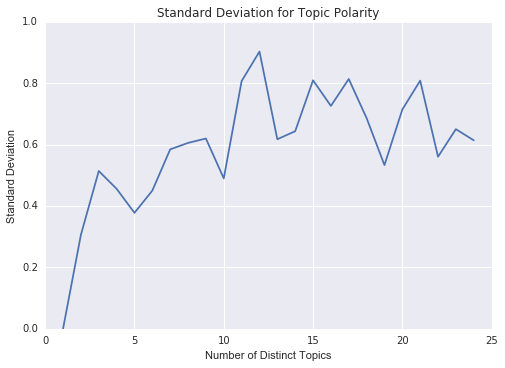

In [43]:
plt.plot(topics_count,std)
plt.title('Standard Deviation for Topic Polarity')
plt.xlabel("Number of Distinct Topics")
plt.ylabel('Standard Deviation')

In [28]:
model = lda.LDA(n_topics=12, n_iter=1500, random_state=1)
model.fit(X)

<lda.lda.LDA instance at 0x1189ca878>

In [29]:
topic_word = model.topic_word_  
n_top_words = 25
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: upon could came eyes many length saw night still even fell thought heart head face lay felt among man became within voice words room hand
Topic 2: one could however first two little much time found without whole although made great far would three means large manner upon less nearly course doubt
Topic 3: one beauty yet art seen valley light scene young hundred character green ellison whose love sense flowers magnificent form became trees eye less sentiment color
Topic 4: de said sir jupiter upon legrand let skull goodfellow wid massa te ugh majesty table bug little ye replied parchment tree shuttleworthy angel dat thin
Topic 5: would body upon corpse dupin marie one madame murder evidence yet le water girl said rue suspicion committed river prefect house paper question morning us
Topic 6: one say upon good thing well old man see way sure like day made take took every make done much would quite never get know
Topic 7: us king said like ship sea water let wind thousand perceive 

In [30]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 25
topic_dict={}
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_dict['Topic '+str(i+1)]=[(word,TextBlob(word).sentiment.polarity) for word in topic_words]
    
    
        
    
        
        

In [31]:
topic_dict

{'Topic 1': [(u'upon', 0.0),
  (u'could', 0.0),
  (u'came', 0.0),
  (u'eyes', 0.0),
  (u'many', 0.5),
  (u'length', 0.0),
  (u'saw', 0.0),
  (u'night', 0.0),
  (u'still', 0.0),
  (u'even', 0.0),
  (u'fell', 0.0),
  (u'thought', 0.0),
  (u'heart', 0.0),
  (u'head', 0.0),
  (u'face', 0.0),
  (u'lay', 0.0),
  (u'felt', 0.0),
  (u'among', 0.0),
  (u'man', 0.0),
  (u'became', 0.0),
  (u'within', 0.0),
  (u'voice', 0.0),
  (u'words', 0.0),
  (u'room', 0.0),
  (u'hand', 0.0)],
 'Topic 10': [(u'said', 0.0),
  (u'little', -0.1875),
  (u'gentleman', 0.0),
  (u'de', 0.0),
  (u'nose', 0.0),
  (u'lady', 0.0),
  (u'replied', 0.0),
  (u'monsieur', 0.0),
  (u'madame', 0.0),
  (u'great', 0.8),
  (u'acquaintance', 0.0),
  (u'name', 0.0),
  (u'pompey', 0.0),
  (u'really', 0.2),
  (u'smith', 0.0),
  (u'oh', 0.0),
  (u'lalande', 0.0),
  (u'yes', 0.0),
  (u'diddler', 0.0),
  (u'eyes', 0.0),
  (u'age', 0.0),
  (u'big', 0.0),
  (u'john', 0.0),
  (u'thus', 0.0),
  (u'sir', 0.0)],
 'Topic 11': [(u'long', -0.05)

In [32]:
from pymongo import MongoClient
client=MongoClient()

In [33]:
db = client.test_database

In [34]:
#name poe collection
poe = db.poe

In [35]:
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 25
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    poe.insert_one({'Topic '+str(i+1):[(word,TextBlob(word).sentiment.polarity) for word in topic_words]})

In [39]:
for doc in poe.find():
    print doc

{u'_id': ObjectId('57b629bf9e65dbc025ea0079'), u'Topic 1': [[u'upon', 0.0], [u'could', 0.0], [u'came', 0.0], [u'eyes', 0.0], [u'many', 0.5], [u'length', 0.0], [u'saw', 0.0], [u'night', 0.0], [u'still', 0.0], [u'even', 0.0], [u'fell', 0.0], [u'thought', 0.0], [u'heart', 0.0], [u'head', 0.0], [u'face', 0.0], [u'lay', 0.0], [u'felt', 0.0], [u'among', 0.0], [u'man', 0.0], [u'became', 0.0], [u'within', 0.0], [u'voice', 0.0], [u'words', 0.0], [u'room', 0.0], [u'hand', 0.0]]}
{u'Topic 2': [[u'one', 0.0], [u'could', 0.0], [u'however', 0.0], [u'first', 0.25], [u'two', 0.0], [u'little', -0.1875], [u'much', 0.2], [u'time', 0.0], [u'found', 0.0], [u'without', 0.0], [u'whole', 0.2], [u'although', 0.0], [u'made', 0.0], [u'great', 0.8], [u'far', 0.1], [u'would', 0.0], [u'three', 0.0], [u'means', 0.0], [u'large', 0.21428571428571427], [u'manner', 0.0], [u'upon', 0.0], [u'less', -0.16666666666666666], [u'nearly', 0.1], [u'course', 0.0], [u'doubt', 0.0]], u'_id': ObjectId('57b629bf9e65dbc025ea007a')}
{u

In [41]:
db.poe.count()

12